#  Predicting the stock market values using Machine Learning   

In this notebook, we're going to go a machine learning project with the goal of predicting the stock market values from the Tesla Dataset. 

## 1. Problem Definition
How well can our proposed approach predict predict the future closing value of a stock market, given its characteristics and previous examples of previous stock market closing values

# 1. Understanding the features
 first of all the feature **Close** is the target we wish to find
 we need a data dictionarry fro the rest

## 2. Dataset
The dataset is attached to the project in the data folder contains the stock market info from mid-2010 to 2019 in the file tesla.csv

There are multiple variables in the dataset : date, open, high, low, last, close, Adj Close.

    * The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
    * High and Low represent the maximum and minimum price of the share for the day.

## 2. Dataset
The dataset is attached to the project in the data folder contains the stock market info from mid-2010 to 2019 in the file tesla.csv

There are multiple variables in the dataset : date, open, high, low, last, close, Adj Close.

    * The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
    * High and Low represent the maximum and minimum price of the share for the day.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# EDA : Exploratory Data Analysis

In [21]:
# Importing the data and converting the Date column
df = pd.read_csv("data/tesla.csv", low_memory = False, parse_dates=["Date"], infer_datetime_format=True)

In [22]:
# Checking for missing data
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [23]:
# Checking for non-numerical data
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

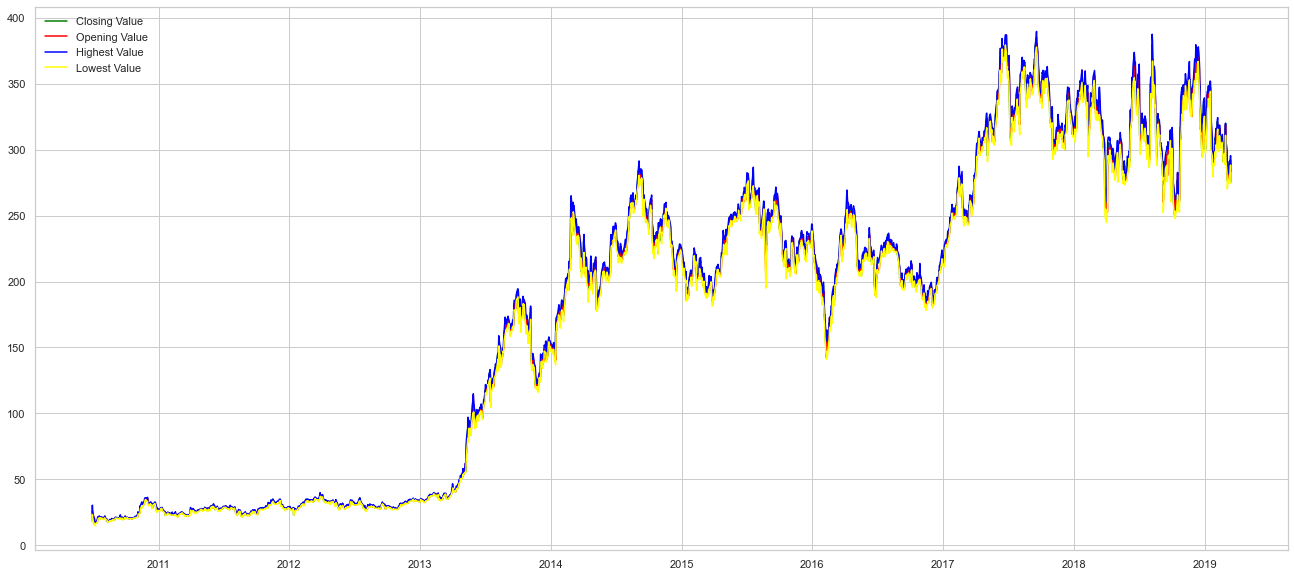

In [61]:
%matplotlib inline
# Data visualization
sns.set_theme(style= "whitegrid")
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df.Date, df.Close, color = 'green', label = "Closing Value");
ax.plot(df.Date, df.Open,  color='red', label = "Opening Value");
ax.plot(df.Date, df.High, color='blue', label="Highest Value");
ax.plot(df.Date, df.Low, color='yellow', label="Lowest Value");
ax.legend(loc='upper left' ,frameon=False);


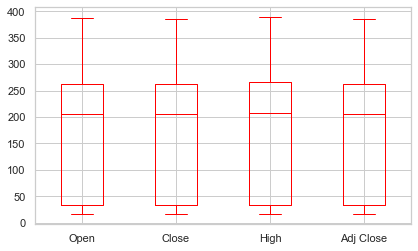

In [25]:
# Candlestick plot 
df[["Open","Close","High","Adj Close"]].plot(kind="box",color ="red");

In [26]:
# Creating a copy of the DataFrame
df2 = df.copy()

In [27]:
# Sorting the data frame by Date
df2.sort_values(by=["Date"],inplace=True,ascending=True)
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [28]:
#Creating a function to add Datetime parameters for a better prediction
def add_date_params(df,Date):
    """
    Adding different Date time parameters for the time series DataFrame
    """
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Day"] = df.Date.dt.day
    df["Day_Of_Year"] = df.Date.dt.dayofyear
    df["Week_Of_Year"] = df.Date.dt.isocalendar().week.astype(np.int64)
    # The day of the week with Monday=0 to Sunday=6
    df["Day_Of_Week"] = df.Date.dt.dayofweek
    df.drop("Date",axis=1,inplace=True)
    return df

In [29]:
Date=df2.Date
add_date_params(df2,Date)
df2.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,187,27,1


In [30]:
# A function to search for duplicates in any pandas DataFrame
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns 
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at index 'x'.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from index (x+1) till the last column
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            # test if the two selected columns are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [31]:
df2.rename(columns ={"Adj Close":"ADJ"},inplace = True)
df2.head()

,Open,High,Low,Close,ADJ,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,187,27,1


In [32]:
getDuplicateColumns(df2)

['ADJ']

In [33]:
# Deleting the duplicate columns
df2.drop("ADJ",axis=1,inplace=True)
df2.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,187,27,1


In [34]:
# Creating a correlation matrix of the DataFrame
correlation_matrix = df2.corr()
correlation_matrix

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
Open,1.000000,0.999578,0.999566,0.999054,0.457938,0.920494,-0.000987,0.005597,-0.001360,0.003145,-0.000750
High,0.999578,1.000000,0.999490,0.999631,0.466999,0.921259,-0.002066,0.004730,-0.002507,0.002200,-0.003297
Low,0.999566,0.999490,1.000000,0.999580,0.448387,0.920112,-0.001177,0.006909,-0.001433,0.003027,0.000294
Close,0.999054,0.999631,0.999580,1.000000,0.458157,0.920846,-0.002070,0.005874,-0.002410,0.002242,-0.002297
Volume,0.457938,0.466999,0.448387,0.458157,1.000000,0.423072,-0.014579,-0.070819,-0.021447,-0.011711,-0.023801
Year,0.920494,0.921259,0.920112,0.920846,0.423072,1.000000,-0.144177,-0.007298,-0.144212,-0.139127,0.003431
Month,-0.000987,-0.002066,-0.001177,-0.002070,-0.014579,-0.144177,1.000000,0.004917,0.996550,0.979165,-0.014138
Day,0.005597,0.004730,0.006909,0.005874,-0.070819,-0.007298,0.004917,1.000000,0.087596,0.069207,-0.006365
Day_Of_Year,-0.001360,-0.002507,-0.001433,-0.002410,-0.021447,-0.144212,0.996550,0.087596,1.000000,0.981123,-0.014496
Week_Of_Year,0.003145,0.002200,0.003027,0.002242,-0.011711,-0.139127,0.979165,0.069207,0.981123,1.000000,-0.016440


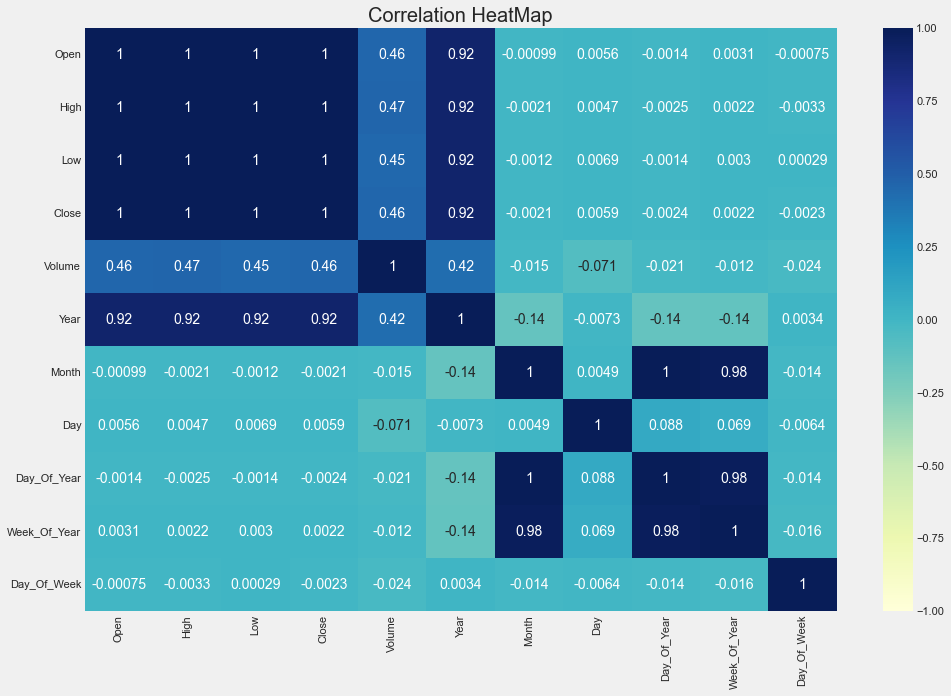

In [35]:
# Visualizing the Correlation Matrix in a Seaborn heatmap
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu",vmin=-1, vmax=1)
ax.set_title("Correlation HeatMap", fontsize=20);

# Training the Models

# Training the Models

In [36]:
np.random.seed(19)
df2.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,187,27,1


In [37]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [38]:
# Splitting the Data into training and test sets
test_set = df2[df2.Year == 2019]
train_set = df2[df2.Year !=2019]


In [39]:
# Split data into X (features) and y (labels) 
X_train, y_train = train_set.drop("Close",axis=1), train_set.Close
X_test, y_test = test_set.drop("Close",axis=1), test_set.Close

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2142, 10), (2142,), (51, 10), (51,))

In [40]:
models = {
           'RF': RandomForestRegressor(),
           'KNN': KNeighborsRegressor(),
           'Linear regression': LinearRegression(),
           'SVM Regressor': SVR(),
           'ADABOOST Regressor': AdaBoostRegressor(),
           'XGB': XGBRegressor(),
           'CatBoost': CatBoostRegressor(),
           'BayesianRidge': linear_model.BayesianRidge()
    }
# Creating a function to test several baseline methods at the same time
def baseline_models (models,X_train,y_train,X_test,y_test):
   
    results = {}
    for modelname, model in models.items():
        model.fit(X_train, y_train)
        # The metric used is r^2 
        results[modelname] = model.score(X_test, y_test) 
    
    return results

In [41]:
results = baseline_models (models,X_train,y_train,X_test,y_test)

Learning rate set to 0.046179
0:	learn: 110.2183167	total: 53.6ms	remaining: 53.6s
1:	learn: 105.2940686	total: 57.7ms	remaining: 28.8s
2:	learn: 100.6169032	total: 61.4ms	remaining: 20.4s
3:	learn: 96.2936049	total: 65.4ms	remaining: 16.3s
4:	learn: 92.0240263	total: 68.8ms	remaining: 13.7s
5:	learn: 87.9905009	total: 72.6ms	remaining: 12s
6:	learn: 84.1648926	total: 76.1ms	remaining: 10.8s
7:	learn: 80.5489305	total: 79.8ms	remaining: 9.89s
8:	learn: 77.0165425	total: 83.1ms	remaining: 9.15s
9:	learn: 73.6493396	total: 87ms	remaining: 8.61s
10:	learn: 70.4865018	total: 90.3ms	remaining: 8.12s
11:	learn: 67.4341957	total: 93.9ms	remaining: 7.73s
12:	learn: 64.5446032	total: 96.7ms	remaining: 7.34s
13:	learn: 61.7875180	total: 99.5ms	remaining: 7.01s
14:	learn: 59.0782660	total: 102ms	remaining: 6.71s
15:	learn: 56.5407992	total: 104ms	remaining: 6.41s
16:	learn: 54.0978649	total: 107ms	remaining: 6.17s
17:	learn: 51.7844577	total: 109ms	remaining: 5.92s
18:	learn: 49.5719468	total: 11

257:	learn: 3.1463655	total: 512ms	remaining: 1.47s
258:	learn: 3.1415690	total: 514ms	remaining: 1.47s
259:	learn: 3.1361381	total: 516ms	remaining: 1.47s
260:	learn: 3.1326672	total: 518ms	remaining: 1.47s
261:	learn: 3.1289568	total: 519ms	remaining: 1.46s
262:	learn: 3.1246448	total: 521ms	remaining: 1.46s
263:	learn: 3.1201986	total: 523ms	remaining: 1.46s
264:	learn: 3.1156693	total: 524ms	remaining: 1.45s
265:	learn: 3.1116474	total: 527ms	remaining: 1.45s
266:	learn: 3.1064322	total: 528ms	remaining: 1.45s
267:	learn: 3.1050599	total: 530ms	remaining: 1.45s
268:	learn: 3.0995397	total: 533ms	remaining: 1.45s
269:	learn: 3.0966059	total: 535ms	remaining: 1.45s
270:	learn: 3.0926773	total: 537ms	remaining: 1.44s
271:	learn: 3.0884732	total: 538ms	remaining: 1.44s
272:	learn: 3.0825389	total: 540ms	remaining: 1.44s
273:	learn: 3.0780533	total: 542ms	remaining: 1.44s
274:	learn: 3.0734074	total: 543ms	remaining: 1.43s
275:	learn: 3.0684152	total: 545ms	remaining: 1.43s
276:	learn: 

467:	learn: 2.4789081	total: 858ms	remaining: 976ms
468:	learn: 2.4764373	total: 860ms	remaining: 974ms
469:	learn: 2.4755515	total: 862ms	remaining: 972ms
470:	learn: 2.4739732	total: 864ms	remaining: 970ms
471:	learn: 2.4713402	total: 865ms	remaining: 968ms
472:	learn: 2.4699159	total: 867ms	remaining: 966ms
473:	learn: 2.4674716	total: 869ms	remaining: 964ms
474:	learn: 2.4649460	total: 872ms	remaining: 963ms
475:	learn: 2.4632239	total: 873ms	remaining: 961ms
476:	learn: 2.4606174	total: 875ms	remaining: 960ms
477:	learn: 2.4566355	total: 877ms	remaining: 958ms
478:	learn: 2.4543329	total: 879ms	remaining: 956ms
479:	learn: 2.4523316	total: 881ms	remaining: 954ms
480:	learn: 2.4487726	total: 882ms	remaining: 952ms
481:	learn: 2.4472023	total: 884ms	remaining: 950ms
482:	learn: 2.4463813	total: 886ms	remaining: 949ms
483:	learn: 2.4433908	total: 888ms	remaining: 947ms
484:	learn: 2.4411451	total: 890ms	remaining: 945ms
485:	learn: 2.4406587	total: 891ms	remaining: 943ms
486:	learn: 

670:	learn: 2.0997609	total: 1.21s	remaining: 591ms
671:	learn: 2.0980567	total: 1.21s	remaining: 589ms
672:	learn: 2.0968470	total: 1.21s	remaining: 588ms
673:	learn: 2.0952453	total: 1.21s	remaining: 586ms
674:	learn: 2.0942301	total: 1.21s	remaining: 584ms
675:	learn: 2.0920904	total: 1.21s	remaining: 582ms
676:	learn: 2.0904084	total: 1.22s	remaining: 580ms
677:	learn: 2.0898550	total: 1.22s	remaining: 578ms
678:	learn: 2.0888186	total: 1.22s	remaining: 577ms
679:	learn: 2.0862391	total: 1.22s	remaining: 575ms
680:	learn: 2.0841032	total: 1.22s	remaining: 573ms
681:	learn: 2.0827894	total: 1.23s	remaining: 572ms
682:	learn: 2.0803714	total: 1.23s	remaining: 570ms
683:	learn: 2.0799829	total: 1.23s	remaining: 568ms
684:	learn: 2.0788788	total: 1.23s	remaining: 566ms
685:	learn: 2.0776099	total: 1.23s	remaining: 564ms
686:	learn: 2.0749223	total: 1.23s	remaining: 562ms
687:	learn: 2.0741783	total: 1.24s	remaining: 560ms
688:	learn: 2.0734661	total: 1.24s	remaining: 559ms
689:	learn: 

877:	learn: 1.8318961	total: 1.55s	remaining: 215ms
878:	learn: 1.8312295	total: 1.55s	remaining: 214ms
879:	learn: 1.8300981	total: 1.55s	remaining: 212ms
880:	learn: 1.8291721	total: 1.55s	remaining: 210ms
881:	learn: 1.8283455	total: 1.56s	remaining: 208ms
882:	learn: 1.8271177	total: 1.56s	remaining: 206ms
883:	learn: 1.8260543	total: 1.56s	remaining: 205ms
884:	learn: 1.8246024	total: 1.56s	remaining: 203ms
885:	learn: 1.8233478	total: 1.56s	remaining: 201ms
886:	learn: 1.8225334	total: 1.56s	remaining: 199ms
887:	learn: 1.8213205	total: 1.57s	remaining: 198ms
888:	learn: 1.8199199	total: 1.57s	remaining: 196ms
889:	learn: 1.8182974	total: 1.57s	remaining: 194ms
890:	learn: 1.8172297	total: 1.57s	remaining: 192ms
891:	learn: 1.8164335	total: 1.57s	remaining: 191ms
892:	learn: 1.8156727	total: 1.57s	remaining: 189ms
893:	learn: 1.8147220	total: 1.58s	remaining: 187ms
894:	learn: 1.8126768	total: 1.58s	remaining: 185ms
895:	learn: 1.8118975	total: 1.58s	remaining: 183ms
896:	learn: 

In [42]:
results

{'RF': 0.9647932430180404,
 'KNN': -14.87253460140302,
 'Linear regression': 0.97983711596318,
 'SVM Regressor': -17.69933011671753,
 'ADABOOST Regressor': 0.9395688163921281,
 'XGB': 0.9592867128373521,
 'CatBoost': 0.9544054748272428,
 'BayesianRidge': 0.9799917657557913}

In [43]:
# Putting the model results in a separated DataFrame
comparaison = pd.DataFrame(results, index=["R^2"])
comparaison.head()

,RF,KNN,Linear regression,SVM Regressor,ADABOOST Regressor,XGB,CatBoost,BayesianRidge
R2,0.964793,-14.872535,0.979837,-17.69933,0.939569,0.959287,0.954405,0.979992


,RF,KNN,Linear regression,SVM Regressor,ADABOOST Regressor,XGB,CatBoost,BayesianRidge
R2,0.964793,-14.872535,0.979837,-17.69933,0.939569,0.959287,0.954405,0.979992


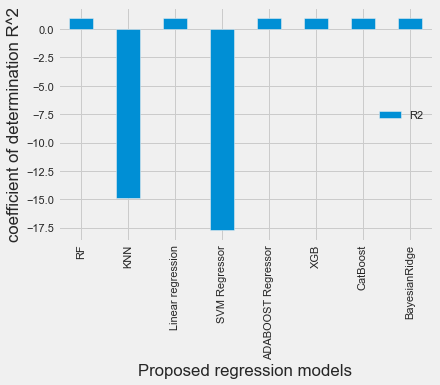

In [51]:
# Visulazing the DataFrame in a bar plot
plt = comparaison.T.plot.bar();
plt.set_xlabel('Proposed regression models')
plt.set_ylabel('coefficient of determination R^2')
plt.legend(frameon=False,bbox_to_anchor = (1, 0.6));
comparaison.head()

In [52]:
# A different bar plot with labels 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, y[i], ha = 'center',c='darkgoldenrod')

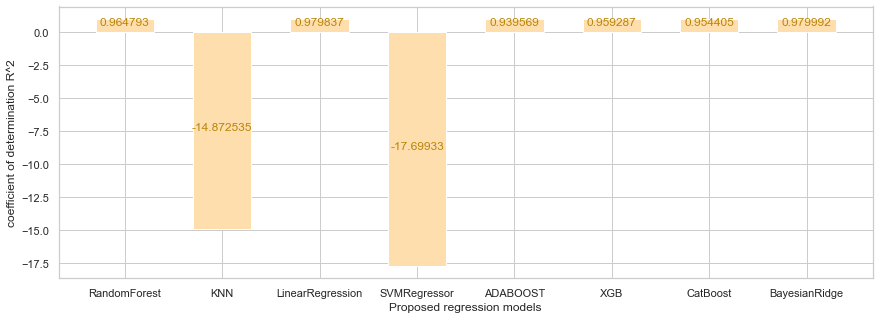

In [70]:
x = ["RandomForest", "KNN", "LinearRegression", "SVMRegressor", "ADABOOST","XGB", "CatBoost","BayesianRidge"]
y = [0.964793 , -14.872535 , 0.979837 , -17.69933, 0.939569 , 0.959287 , 0.954405, 0.979992]
# plt.figure(figsize = (13, 5))
#making the bar chart on the data
plt.figure(figsize = (13, 5))
plt.bar(x, y, width = 0.6,color = 'navajowhite')
plt.xlabel('Proposed regression models)
plt.ylabel('coefficient of determination R^2')
# calling the function to add value labels
addlabels(x,y);

## In the following section we will choose the best  model and apply hyperparameter tuning to them using GridSearchCV


In [72]:
from sklearn.model_selection import RandomizedSearchCV
CatB_grid = {"depth": np.arange(4,12,2),
             "learning_rate": np.arange(0.01,1,0.01),
             "iterations" : np.arange(20,100,10)
            }

In [73]:
%%time 
# Instantiate The CatBoost model with RandomizedSearchCV
CatB_model = RandomizedSearchCV(CatBoostRegressor(),
                                random_state=19,
                                n_jobs = -1,
                                param_distributions = CatB_grid,
                                n_iter = 100,
                                cv=5,
                                verbose = True)
# Fit the RandomizedSearchCV model
CatB_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0:	learn: 83.7501531	total: 4.93ms	remaining: 340ms
1:	learn: 61.2925778	total: 9.88ms	remaining: 336ms
2:	learn: 45.0139809	total: 13.6ms	remaining: 303ms
3:	learn: 33.3198615	total: 15.8ms	remaining: 260ms
4:	learn: 25.4322782	total: 18ms	remaining: 234ms
5:	learn: 19.7258144	total: 19.9ms	remaining: 213ms
6:	learn: 15.8831073	total: 21.8ms	remaining: 197ms
7:	learn: 13.2604949	total: 23.9ms	remaining: 185ms
8:	learn: 11.8223806	total: 25.9ms	remaining: 175ms
9:	learn: 10.4297395	total: 27.9ms	remaining: 168ms
10:	learn: 9.4644727	total: 30.1ms	remaining: 162ms
11:	learn: 8.9438907	total: 32.1ms	remaining: 155ms
12:	learn: 8.6344655	total: 34ms	remaining: 149ms
13:	learn: 8.1246792	total: 35.9ms	remaining: 144ms
14:	learn: 7.6448481	total: 38ms	remaining: 139ms
15:	learn: 7.1866834	total: 40.1ms	remaining: 135ms
16:	learn: 6.9571846	total: 42.3ms	remaining: 132ms
17:	learn: 6.6638786	total: 44.6ms	remaining: 129ms
18:	lea

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000023CE15ABD90>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'depth': array([ 4,  6,  8, 10]),
                                        'iterations': array([20, 30, 40, 50, 60, 70, 80, 90]),
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0...
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
   

In [74]:
CatB_model.best_params_

{'learning_rate': 0.3, 'iterations': 70, 'depth': 4}

In [75]:
CatBoost_best_model = CatBoostRegressor(learning_rate=0.3, iterations = 70, depth = 4)
CatBoost_best_model.fit(X_train,y_train)

0:	learn: 83.7501531	total: 1.01ms	remaining: 69.5ms
1:	learn: 61.2925778	total: 2.23ms	remaining: 76ms
2:	learn: 45.0139809	total: 4.28ms	remaining: 95.6ms
3:	learn: 33.3198615	total: 5.54ms	remaining: 91.5ms
4:	learn: 25.4322782	total: 6.51ms	remaining: 84.7ms
5:	learn: 19.7258144	total: 7.44ms	remaining: 79.3ms
6:	learn: 15.8831073	total: 8.43ms	remaining: 75.9ms
7:	learn: 13.2604949	total: 9.44ms	remaining: 73.1ms
8:	learn: 11.8223806	total: 10.4ms	remaining: 70.2ms
9:	learn: 10.4297395	total: 11.4ms	remaining: 68.3ms
10:	learn: 9.4644727	total: 12.5ms	remaining: 66.8ms
11:	learn: 8.9438907	total: 13.4ms	remaining: 64.7ms
12:	learn: 8.6344655	total: 14.4ms	remaining: 62.9ms
13:	learn: 8.1246792	total: 15.3ms	remaining: 61.2ms
14:	learn: 7.6448481	total: 16.3ms	remaining: 59.9ms
15:	learn: 7.1866834	total: 18.5ms	remaining: 62.6ms
16:	learn: 6.9571846	total: 19.9ms	remaining: 62.1ms
17:	learn: 6.6638786	total: 20.9ms	remaining: 60.3ms
18:	learn: 6.3497416	total: 21.8ms	remaining: 58

In [76]:
random_forest_grid ={ "n_estimators" : np.arange(10,100,10),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2),
          "max_features" : [0.5,1, "sqrt" , "auto"],
          }

In [77]:
Random_forest_model = RandomizedSearchCV(RandomForestRegressor(),
                                random_state=19,
                                n_jobs = -1,
                                param_distributions = random_forest_grid,
                                n_iter = 100,
                                cv=5,
                                verbose = True)
# Fit the RandomizedSearchCV model
Random_forest_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=19, verbose=True)

In [78]:
Random_forest_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': None}

In [79]:
Random_forest_best_model = RandomForestRegressor( n_estimators = 30, min_samples_split = 12,min_samples_leaf=3,
                                                max_features= 'auto', max_depth = None)
Random_forest_best_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=12, n_estimators=30)

### Evaluating the Models performance

In [80]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score,mean_squared_error

In [81]:
# Creating an evaluation function for RMSLE
def RMSLE(y_test,y_predicted):
    """
    Calculates the RMSLE (Root Mean Squared Log Error) between model predictions and true values.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_predicted))

In [82]:
# Creating a function with several evaluation metrics
def evaluating_reg_models(model):
    test_preds = model.predict(X_test)
    scores = {"MAE" : mean_absolute_error(y_test,test_preds),
             "RMSLE" : RMSLE(y_test,test_preds),
             "MSE" : mean_squared_error(y_test,test_preds),
             "R^2" : r2_score(y_test,test_preds),
             "RMSE": mean_squared_error(y_test,test_preds,squared=False),
             "MSLE": mean_squared_log_error(y_test,test_preds)}
    return scores

In [83]:
evaluating_reg_models(CatBoost_best_model)

{'MAE': 4.601509929442768,
 'RMSLE': 0.018382158220525576,
 'MSE': 30.985590635305122,
 'R^2': 0.9199182124313414,
 'RMSE': 5.566470213277452,
 'MSLE': 0.00033790374084443606}

In [84]:
evaluating_reg_models(Random_forest_best_model)

{'MAE': 2.9516314094190514,
 'RMSLE': 0.012031133547167132,
 'MSE': 13.700921152699925,
 'R^2': 0.9645901777326359,
 'RMSE': 3.701475537228353,
 'MSLE': 0.00014474817442977037}

In [85]:
CatBoost_best_model.feature_importances_

array([6.95011458e+00, 7.37837249e+00, 1.65128802e+01, 4.59036086e+00,
       6.42233703e+01, 1.58706516e-01, 4.91086276e-02, 8.56775955e-02,
       4.44681370e-02, 6.94069003e-03])

In [86]:
Random_forest_best_model.feature_importances_

array([5.41122080e-03, 6.43961849e-01, 3.50543239e-01, 2.48259776e-05,
       4.47772540e-06, 1.89564717e-06, 1.63776950e-05, 1.80749583e-05,
       8.31954150e-06, 9.71956281e-06])

In [87]:
# Helper function for plottin feature importance
def plot_features(columns, importances, n=20):
    df= (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
        .sort_values("feature_importances",ascending = False)
        .reset_index(drop=True))
    
    #Plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

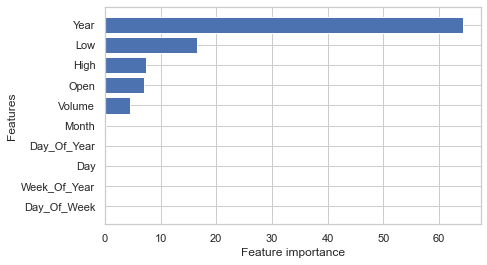

In [88]:
plot_features(X_train.columns, CatBoost_best_model.feature_importances_)

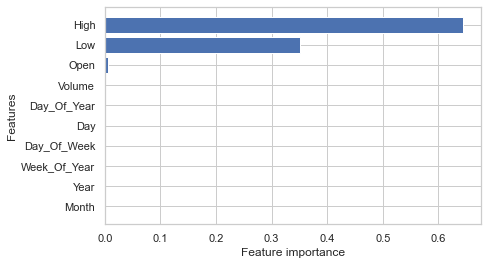

In [89]:
plot_features(X_train.columns, Random_forest_best_model.feature_importances_)